**Nama  : Ridwan Akmal <br>
Universitas : Universitas Negeri Yogyakarta** <br>
          *MSIB 3 DICODING SUBMISSION MACHINE LEARNING TERAPAN(Predictive Analysis)* 

# **IMPORT PACKAGE**

In [2]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **DATA LOADING**

In [3]:
from google.colab import files
up = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [4]:
# Load Tweet dataset
df = pd.read_csv(io.BytesIO(up['Telco-Customer-Churn.csv']))
# Output first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# **DATA UNDERSTANDING & EDA**

Mengecek informasi pada data

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Informasi Statistik dari data

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Didalam dataset terdapat 20 Kolom 
Kumpulan data mencakup informasi tentang:

- Pelanggan yang pergi dalam sebulan terakhir – kolomnya disebut `Churn`

- Layanan yang telah didaftarkan oleh setiap pelanggan –  phone service, multiple lines, internet services, online security, online backup, device protection, tech support, and streaming TV dan streaming movies

- Informasi akun pelanggan - seperti contract, payment method, paperless billing, monthly charges, and total charges

- Info demografis tentang pelanggan – gender, tenure, lalu Partner, Dependents

In [9]:
# mulai melakukan proses manipulasi data
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


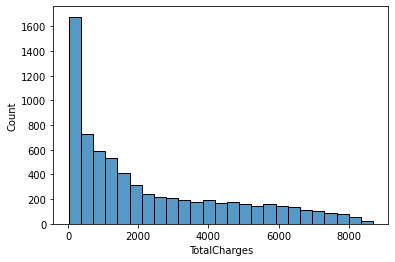

In [12]:
# melihat persebaran data di totalcharges
sns.histplot(data=df, x='TotalCharges')

Nah karena distribusinya itu di skewed kita akan lakukan impoutation dg menggunakan median

In [13]:
df = df.fillna(df["TotalCharges"].median())

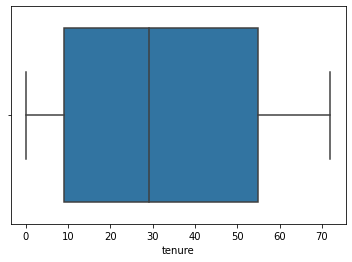

In [14]:
# melihat outliers di beberapa data numeriknya
sns.boxplot(x=df.tenure)

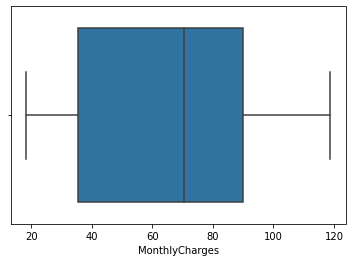

In [15]:
sns.boxplot(x=df.MonthlyCharges)

Oke aman semuanya lanjut lagi ke proses berikutnya

# **ANALISIS UNIVARIAT&MULTIVARIAT**






In [16]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [17]:
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
          'PhoneService', 'MultipleLines', 'InternetService',
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
          'PaperlessBilling', 'PaymentMethod']
num_col = ['Tenure', 'MonthlyCharges', 'TotalCharges']

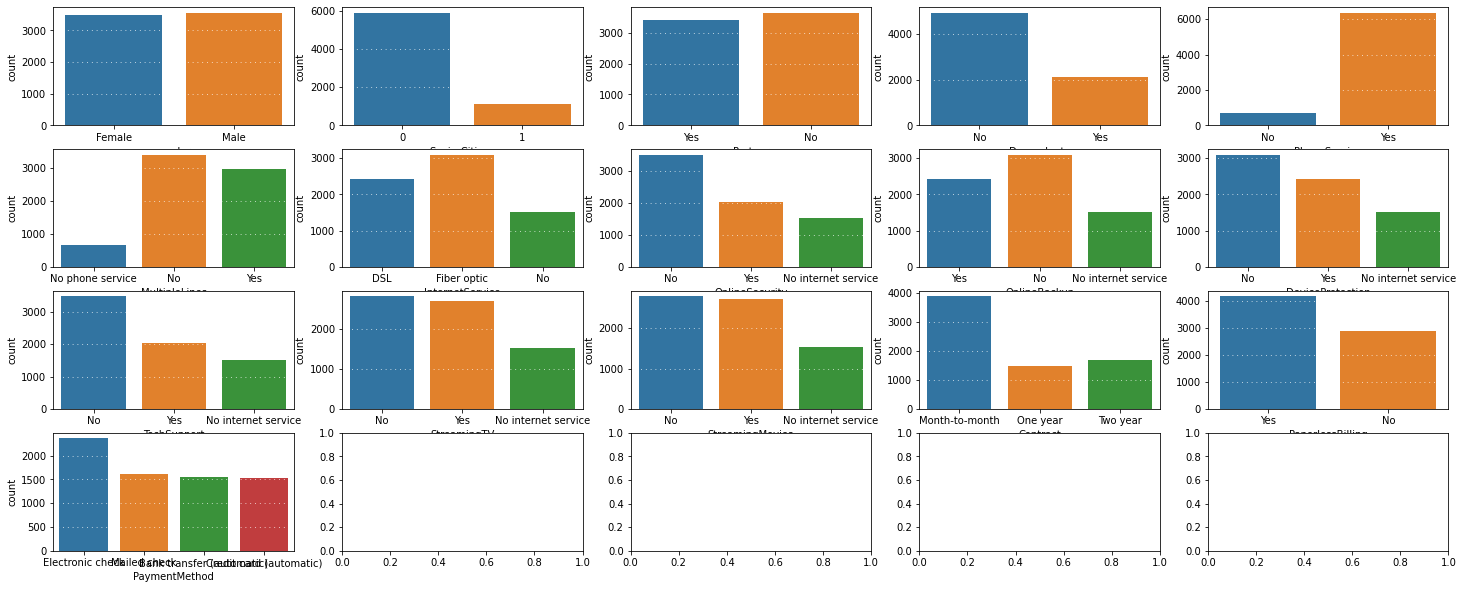

In [18]:
fig, axes = plt.subplots(4,5,figsize=(25,10))

# biar bisa looping kita akan lakukan flatten

for cat, ax in zip(cat_col, axes.flatten()):
    sns.countplot(cat, data=df,ax=ax)
    ax.grid(color='#FFFFFF', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

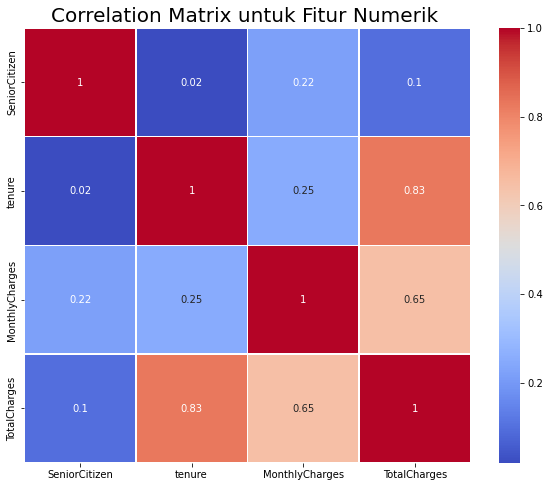

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [20]:
import plotly.express as px
import plotly.graph_objects as go

In [21]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Distribusi Payment Method dengan Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Dapat dilihat dari grafik customer yang churn(pindah) dengan tingkat presentase terttnggi adalah yang menggunakan Elektronik check sebagai Metode Pembayaran.
- Pelanggan yang memilih mailed check,bank transfer, credit card(automatic) sebagai Metode Pembayaran cenderung tidak pindah.

In [22]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Distribusi Customer contract terhadap Churn <b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Sekitar 75% pelanggan dengan Kontrak Bulan-ke-Bulan memilih untuk pindah dibandingkan dengan 13% pelanggan dengan Kontrak Satu Tahun dan 3% dengan Kontrak Dua Tahun

In [23]:
color_map = {"Yes": "#EB1D36", "No": "#42855B"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Distribusi Dependents terhadap Churn </b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Pelanggan yang tidak memiliki dependents(tanggungan) cenderungnya akan churn

In [24]:
color_map = {"Yes": '#F0E161', "No": '#A7D2CB'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Distribusi Partners terhadap Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- sama seperti sebelumnya pelanggan yang tidak memiliki partners akan  cenderung churn

In [25]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Distribusi TechSupport terhadap Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- pelanggan tanpa TechSupport kemungkinan besar akan bermigrasi ke penyedia layanan lain. Terlihat di grafik perbedaanya cukup signifikan antara yang menggunakan TechSupport dan tidak.

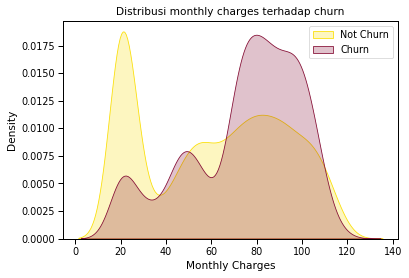

In [26]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="#FBDF07", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="#850E35", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribusi monthly charges terhadap churn');

- Pelanggan dengan Biaya Bulanan yang lebih tinggi juga lebih cenderung melakukan churn

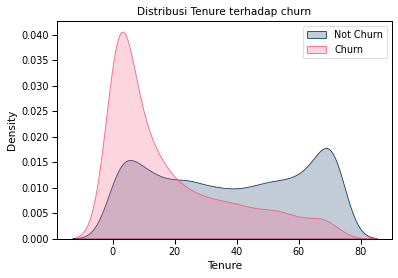

In [27]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="#0F3460", shade = True);
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="#F65A83", shade= True); 
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribusi Tenure terhadap churn');

- Customer baru sebagian besar melakukan churn

# **DATA PREPROCESSING**

In [28]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [29]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [31]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title(f"Distribution for {feature}")
    ax = sns.distplot(frame[feature], color= color)

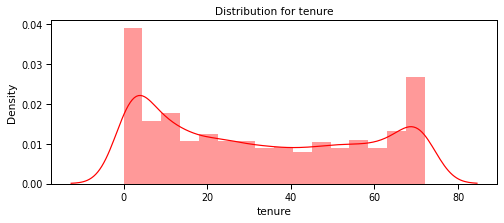

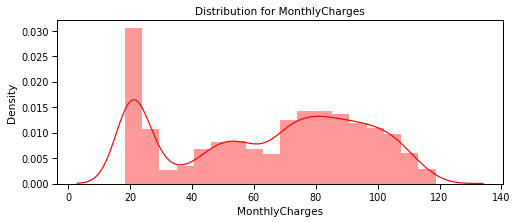

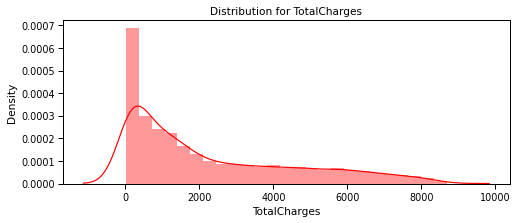

In [32]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape,y_train.shape ,y_test.shape, X_test.shape

((5634, 19), (5634,), (1409,), (1409, 19))

In [34]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [35]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,tenure,MonthlyCharges,TotalCharges
3738,0.102371,-0.521976,-0.263289
3151,-0.711743,0.337478,-0.504814
4860,-0.793155,-0.809013,-0.751213
3867,-0.263980,0.284384,-0.173699
3810,-1.281624,-0.676279,-0.990851


# **MODEL DEVELOPMENT AND EVALUATION**

In [37]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7636621717530163


In [38]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7955997161107168


In [39]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 0.3, max_depth = 50,
                                  min_samples_leaf = 25)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print ("Random Forest Classifier accuracy is :",metrics.accuracy_score(y_test, prediction_test))

Random Forest Classifier accuracy is : 0.8041163946061036


Dari hasil akurasi tersebut dapat saya simpulkan model terbaik untuk dataset kali ini adalah algoritma Random Forest dengan hasil 80%. 

In [44]:
from sklearn.metrics import confusion_matrix

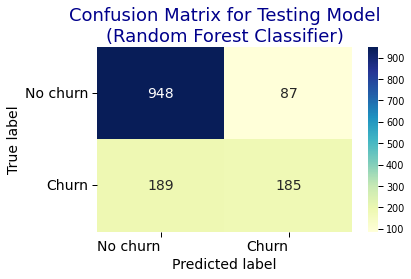

In [45]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 0.3, max_depth = 50,
                                  min_samples_leaf = 25)
model_rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

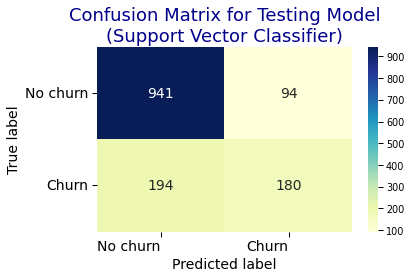

In [46]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train, y_train)
y_test_pred = svc_model.predict(X_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Support Vector Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

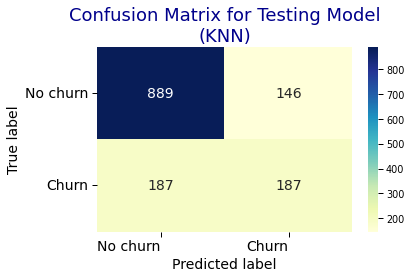

In [47]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
y_test_pred = knn_model.predict(X_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNN)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()